<a href="https://colab.research.google.com/github/vaishaliTaneja/Complete-Python-3-Bootcamp/blob/master/Final_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mounting Google drive to access data**


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = "/content/drive/MyDrive/train.csv"

# **Importing required libraries**

In [3]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 16.0 MB/s eta 0:00:00


In [4]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.7 MB/s eta 0:00:00


In [5]:
import os
import seaborn as sns
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import iplot
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

# **Reading 25% of the data**

In [8]:
from plotly.subplots import make_subplots
df_sample = pd.DataFrame()
chunksize = 10**6
for chunk in pd.read_csv('/content/drive/MyDrive/train.csv', chunksize=chunksize):
  df_sample = df_sample.append(chunk.sample(frac=0.25))

<ipython-input-8-93396c9d5e85>:4: DtypeWarning:

Columns (28,41) have mixed types. Specify dtype option on import or set low_memory=False.

<ipython-input-8-93396c9d5e85>:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-8-93396c9d5e85>:4: DtypeWarning:

Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.

<ipython-input-8-93396c9d5e85>:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-8-93396c9d5e85>:4: DtypeWarning:

Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.

<ipython-input-8-93396c9d5e85>:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-8-93396c9d5e85>:4: DtypeWarning:

Columns (28,41) have mixed typ

In [9]:
df_sample.head()


,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
190506,057c1b53d44c290bfe39594452390b0a,win8defender,1.1.15100.1,4.18.1806.18062,1.273.513.0,0,7.0,0,NaN,53447.0,...,3837.0,0,0.0,0.0,0,0,0.0,0.0,3.0,1
283742,082861c361d5e4b8e7d06a998a94d0ed,win8defender,1.1.15100.1,4.18.1807.18075,1.273.798.0,0,7.0,0,NaN,53447.0,...,3554.0,0,NaN,0.0,0,0,0.0,0.0,6.0,1
778623,165dddfe48bc9d4200f113376ce5fc66,win8defender,1.1.15200.1,4.18.1807.18075,1.275.981.0,0,7.0,0,NaN,53447.0,...,3827.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
780547,166c41dca19c722d03f2e631c6698f8e,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1176.0,0,7.0,0,NaN,23657.0,...,19951.0,0,0.0,0.0,0,0,0.0,0.0,10.0,0
107096,03156b3063a8f4ddc590c66d4c63b6b8,win8defender,1.1.15200.1,4.18.1807.18075,1.275.263.0,0,7.0,0,NaN,6630.0,...,12968.0,1,NaN,0.0,0,0,0.0,0.0,12.0,1


In [10]:
df_sample.shape

(2230371, 83)

In [11]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2230371 entries, 190506 to 8918264
Data columns (total 83 columns):
 #   Column                                             Dtype  
---  ------                                             -----  
 0   MachineIdentifier                                  object 
 1   ProductName                                        object 
 2   EngineVersion                                      object 
 3   AppVersion                                         object 
 4   AvSigVersion                                       object 
 5   IsBeta                                             int64  
 6   RtpStateBitfield                                   float64
 7   IsSxsPassiveMode                                   int64  
 8   DefaultBrowsersIdentifier                          float64
 9   AVProductStatesIdentifier                          float64
 10  AVProductsInstalled                                float64
 11  AVProductsEnabled                            

# **Removing Data with more than 60% null data**

In [12]:
percent = (df_sample.isnull().sum()/df_sample.shape[0]) * 100
new_train_data= pd.DataFrame(data=percent,columns=['Percentofnullvalues'])
new_train_data = new_train_data.sort_values(by='Percentofnullvalues',ascending=False)
print(new_train_data.head(15))

                                       Percentofnullvalues
PuaMode                                          99.972426
Census_ProcessorClass                            99.593207
DefaultBrowsersIdentifier                        95.152241
Census_IsFlightingInternal                       83.038472
Census_InternalBatteryType                       71.041679
Census_ThresholdOptIn                            63.530776
Census_IsWIMBootEnabled                          63.444602
SmartScreen                                      35.591119
OrganizationIdentifier                           30.865044
SMode                                             6.025769
CityIdentifier                                    3.657284
Wdft_IsGamer                                      3.414679
Wdft_RegionIdentifier                             3.414679
Census_InternalBatteryNumberOfCharges             3.022233
Census_FirmwareManufacturerIdentifier             2.057057


In [13]:
def remove_columns(data):

    ''' Computing percent of null values in a dataset based on the feature and removing those features having 60 or more than 60 percent of null values '''
    columns_to_be_removed = []
    percent = (data.isnull().sum()/data.shape[0]) * 100

    for col in data.columns:
        if percent.loc[col] >= 60:
            columns_to_be_removed.append(col)
    new_data = data.drop(columns=columns_to_be_removed)

    return new_data

In [14]:
new_train_data = remove_columns(df_sample)
new_train_data.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
190506,057c1b53d44c290bfe39594452390b0a,win8defender,1.1.15100.1,4.18.1806.18062,1.273.513.0,0,7.0,0,53447.0,1.0,...,142.0,3837.0,0,0.0,0,0,0.0,0.0,3.0,1
283742,082861c361d5e4b8e7d06a998a94d0ed,win8defender,1.1.15100.1,4.18.1807.18075,1.273.798.0,0,7.0,0,53447.0,1.0,...,142.0,3554.0,0,0.0,0,0,0.0,0.0,6.0,1
778623,165dddfe48bc9d4200f113376ce5fc66,win8defender,1.1.15200.1,4.18.1807.18075,1.275.981.0,0,7.0,0,53447.0,1.0,...,142.0,3827.0,0,0.0,0,0,0.0,0.0,10.0,0
780547,166c41dca19c722d03f2e631c6698f8e,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1176.0,0,7.0,0,23657.0,2.0,...,355.0,19951.0,0,0.0,0,0,0.0,0.0,10.0,0
107096,03156b3063a8f4ddc590c66d4c63b6b8,win8defender,1.1.15200.1,4.18.1807.18075,1.275.263.0,0,7.0,0,6630.0,3.0,...,807.0,12968.0,1,0.0,0,0,0.0,0.0,12.0,1


Removing Machine Identifier as it will also be not required

In [15]:
new_train_data.drop(columns="MachineIdentifier", inplace=True)

# Checking if the dataframe is balanced

Text(0.5, 1.0, 'HasDetections(target)')

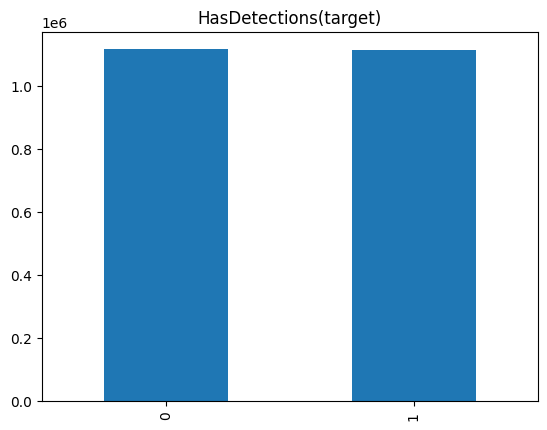

In [16]:
new_train_data['HasDetections'].value_counts().plot.bar()
plt.title('HasDetections(target)')

# **Segregating features into binary, numerical and categorical features**

In [17]:
def types_of_features(data):
    ''' Finding out numerical features, categorical features and binary features in a given dataset and storing them in a separate list'''
    total_features = data.columns
    numerical_features = list(data._get_numeric_data().columns)
    binary_features = []
    categorical_features = list(set(total_features) - set(numerical_features))
    for i in numerical_features:
        if (data[str(i)].min() == 0 and data[str(i)].max() == 1) and data[str(i)].min()== 0:

           binary_features.append(i)
    numerical_features = list(set(numerical_features)- set(binary_features))


    return numerical_features,binary_features,categorical_features

numerical_features,binary_features,categorical_features = types_of_features(new_train_data)

In [18]:
binary_features_after_removal = list(binary_features)
categorical_features_after_removal = list(categorical_features)
numerical_features_after_removal = list(numerical_features)


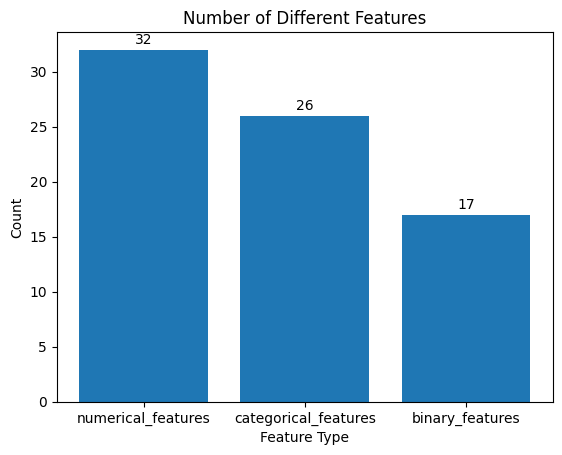

In [19]:
categories_list = []
categories_list.append(len(numerical_features))
categories_list.append(len(categorical_features))
categories_list.append(len(binary_features))

index = ['numerical_features', 'categorical_features', 'binary_features']

plt.bar(index, categories_list)

plt.xlabel('Feature Type')
plt.ylabel('Count')
plt.title('Number of Different Features')

plt.xticks(index, index)

for i, v in enumerate(categories_list):
    plt.text(i, v+0.5, str(v), ha='center')

plt.show()

# **Filling missing values for a few categorical features**

SamrtScreen

In [20]:
new_train_data.SmartScreen.value_counts()

RequireAdmin    1078857
ExistsNotSet     261758
Off               46951
Warn              33893
Prompt             8719
Block              5626
off                 327
On                  194
&#x02;              104
&#x01;               84
on                   39
0                     2
OFF                   1
warn                  1
requireadmin          1
Name: SmartScreen, dtype: int64

In [21]:
trans_dict = {
    'off': 'Off', '&#x02;': '2', '&#x01;': '1', 'on': 'On', 'requireadmin': 'RequireAdmin', 'OFF': 'Off',
    'Promt': 'Prompt', 'requireAdmin': 'RequireAdmin', 'prompt': 'Prompt', 'warn': 'Warn',
    '00000000': '0', '&#x03;': '3', np.nan: 'NoExist'
}
new_train_data.replace({'SmartScreen': trans_dict}, inplace=True)

In [22]:
new_train_data.SmartScreen.value_counts()

RequireAdmin    1078858
NoExist          793814
ExistsNotSet     261758
Off               47279
Warn              33894
Prompt             8719
Block              5626
On                  233
2                   104
1                    84
0                     2
Name: SmartScreen, dtype: int64

For Census_PrimaryDiskTypeName, Census_PowerPlatformRoleName, Census_ChassisTypeName replacing unkown and unspecified with "unknown"

In [23]:
new_train_data.Census_PrimaryDiskTypeName.value_counts()

HDD            1451117
SSD             617451
UNKNOWN          89319
Unspecified      69254
Name: Census_PrimaryDiskTypeName, dtype: int64

In [24]:
new_train_data['Census_PrimaryDiskTypeName'].replace(['UNKNOWN','Unspecified'],'unknown',inplace=True)

In [25]:
new_train_data['Census_PowerPlatformRoleName'].replace(['UNKNOWN','Unspecified'],'unknown',inplace=True)

In [26]:
new_train_data['Census_ChassisTypeName'].replace(['UNKNOWN','Unknown','Other'],'unknown',inplace=True)

In [27]:
new_train_data.Census_PowerPlatformRoleName.value_counts()

Mobile               1545463
Desktop               516640
Slate                 123449
Workstation            27353
SOHOServer              9416
unknown                 5276
EnterpriseServer        1688
AppliancePC             1051
PerformanceServer         21
Name: Census_PowerPlatformRoleName, dtype: int64

# **Removing highly Skewed columns**

In [32]:
pd.options.display.float_format = '{:,.4f}'.format
sk_df = pd.DataFrame([{'column': c, 'uniq': new_train_data[c].nunique(),
                       'skewness': new_train_data[c].value_counts(normalize=True).values[0] * 100} for c in new_train_data.columns])
sk_df = sk_df.sort_values('skewness', ascending=False)
sk_df

,column,uniq,skewness
4,IsBeta,2,99.9995
63,Census_IsFlightsDisabled,2,99.9990
25,AutoSampleOptIn,2,99.9973
26,SMode,2,99.9515
60,Census_IsPortableOperatingSystem,2,99.9446
...,...,...,...
37,Census_ProcessorModelIdentifier,2786,3.2365
3,AvSigVersion,8034,1.1532
12,CityIdentifier,69456,1.1001
66,Census_FirmwareVersionIdentifier,36395,1.0279


**Removing Colums with more than 99 % skewness**

In [33]:
droppable_features = []
droppable_features.extend(sk_df[sk_df.skewness > 99].column.tolist())

In [34]:
droppable_features

['IsBeta',
 'Census_IsFlightsDisabled',
 'AutoSampleOptIn',
 'SMode',
 'Census_IsPortableOperatingSystem',
 'Census_DeviceFamily',
 'UacLuaenable',
 'Census_IsVirtualDevice']

In [35]:
new_train_data.drop(droppable_features, axis=1, inplace=True)

# **Checking how much more missing data needs to be filled**

In [36]:
def GenMissingValueTable (data):
    NoEmptyRows = []
    percentages = []
    ColumnType = []

    for col in new_train_data:
        ColumnType.append(data[col].dtype)
        NoEmptyRows.append(data[col].isnull().sum())
        percentages.append((data[col].isnull().sum()/new_train_data.shape[0])*100)

    MissingValueTable = pd.DataFrame ({'Column Name': data.columns, 'Data Type': ColumnType,
                                   'Number of Empty Rows': NoEmptyRows,'Percentages':percentages})

    return MissingValueTable

In [37]:
MissingValueTable =  GenMissingValueTable (new_train_data)

In [38]:
MissingValueTable

,Column Name,Data Type,Number of Empty Rows,Percentages
0,ProductName,object,0,0.0000
1,EngineVersion,object,0,0.0000
2,AppVersion,object,0,0.0000
3,AvSigVersion,object,0,0.0000
4,RtpStateBitfield,float64,8192,0.3673
...,...,...,...,...
62,Census_IsPenCapable,int64,0,0.0000
63,Census_IsAlwaysOnAlwaysConnectedCapable,float64,17822,0.7991
64,Wdft_IsGamer,float64,76160,3.4147
65,Wdft_RegionIdentifier,float64,76160,3.4147


In [39]:
print ("There are ", (MissingValueTable['Percentages']>=0.01).sum(), "columns with more than 10 % of rows with missing values.")
MissingValueTable [(MissingValueTable['Percentages']>=0.01)]

There are  28 columns with more than 10 % of rows with missing values.


,Column Name,Data Type,Number of Empty Rows,Percentages
4,RtpStateBitfield,float64,8192,0.3673
6,AVProductStatesIdentifier,float64,9083,0.4072
7,AVProductsInstalled,float64,9083,0.4072
8,AVProductsEnabled,float64,9083,0.4072
11,CityIdentifier,float64,81571,3.6573
12,OrganizationIdentifier,float64,688405,30.8650
23,IsProtected,float64,9044,0.4055
24,IeVerIdentifier,float64,14917,0.6688
26,Firewall,float64,22746,1.0198
28,Census_OEMNameIdentifier,float64,24021,1.0770


# **Creating New Features**

In [221]:
# total disk capacity remaining
new_train_data['disk_remain'] = new_train_data['Census_PrimaryDiskTotalCapacity'] - new_train_data['Census_SystemVolumeTotalCapacity']
new_train_data['disk_remain'] = new_train_data['disk_remain'].astype('float32')

# Ram-to-CPU ratio
new_train_data['ram_cpu_ratio'] = new_train_data['Census_TotalPhysicalRAM'] / new_train_data['Census_ProcessorCoreCount']

# Pixel Per Inch PPI sqrt(horizonal**2 + vertical**2) / diagonal
new_train_data['ppi'] = np.sqrt(new_train_data['Census_InternalPrimaryDisplayResolutionHorizontal']**2 + new_train_data['Census_InternalPrimaryDisplayResolutionVertical']**2) / new_train_data['Census_InternalPrimaryDiagonalDisplaySizeInInches']

# PPI squared
new_train_data['ppi2'] = new_train_data.ppi ** 2

# Screen aspect ratio = Horizonal / Vertical
new_train_data['aspect_ratio'] = new_train_data['Census_InternalPrimaryDisplayResolutionHorizontal'] / new_train_data['Census_InternalPrimaryDisplayResolutionVertical']

# Pixel count = Horizonal * Vertical
new_train_data['pixel_count'] = new_train_data['Census_InternalPrimaryDisplayResolutionHorizontal'] * new_train_data['Census_InternalPrimaryDisplayResolutionVertical']



In [222]:
new_train_data['C_drive_capacity'] = new_train_data['Census_SystemVolumeTotalCapacity'] / new_train_data['Census_PrimaryDiskTotalCapacity']
new_train_data['gamer_with_firewall'] = (new_train_data['Wdft_IsGamer'] + new_train_data['Firewall']) % 2
new_train_data['gamer_protected'] = (new_train_data['Wdft_IsGamer'] + new_train_data['IsProtected']) % 2
new_train_data['ram_by_processor'] = new_train_data['Census_TotalPhysicalRAM'] / new_train_data['Census_ProcessorCoreCount']
new_train_data['dimensions'] = new_train_data['Census_InternalPrimaryDisplayResolutionHorizontal'].astype(str) + '*' + new_train_data['Census_InternalPrimaryDisplayResolutionVertical'].astype(str)
new_train_data['dimensions'] = new_train_data['dimensions'].astype('category')
new_train_data['optical_drive_protected'] = (new_train_data['Census_HasOpticalDiskDrive'] + new_train_data['IsProtected']) % 2
new_train_data['Connected_total_capacity'] = (new_train_data['Census_SystemVolumeTotalCapacity'] / (new_train_data['Census_IsAlwaysOnAlwaysConnectedCapable'] + 1))
new_train_data['optical_drive_protected'] = new_train_data['optical_drive_protected'].fillna(new_train_data['optical_drive_protected'].mode()[0])
new_train_data['secure_boot_protected'] = (new_train_data['Census_IsSecureBootEnabled'] + new_train_data['IsProtected']) % 2
new_train_data['secure_boot_protected'] = new_train_data['secure_boot_protected'].fillna(new_train_data['secure_boot_protected'].mode()[0])
# new_train_data['transformed_build_revision'] = np.log(new_train_data['Census_OSBuildRevision'])
# new_train_data['transformed_build_revision'] = new_train_data['transformed_build_revision'].fillna(-1)
new_train_data['vertical_display_by_inches'] = new_train_data['Census_InternalPrimaryDisplayResolutionVertical'] / new_train_data['Census_InternalPrimaryDiagonalDisplaySizeInInches']
new_train_data['vertical_display_by_inches'] = new_train_data['vertical_display_by_inches'].fillna(-1)

In [195]:
new_train_data.drop(columns="transformed_build_revision", inplace=True)

# **Filling Missing Values for different features**

In [40]:
numerical_features,binary_features,categorical_features = types_of_features(new_train_data)
binary_features_after_removal = list(binary_features)
categorical_features_after_removal = list(categorical_features)
numerical_features_after_removal = list(numerical_features)

**Replacing Missing values with Median for Numerical & Binary features**

In [41]:
# impute some median values first
# median is may be more robust to outliers (if they exist)
# only use SimpleImputer for Diagonal, NumberOfCharges
imputer = SimpleImputer(strategy='median')
for feature in numerical_features:
    imputed_values = imputer.fit_transform(new_train_data[feature].values.reshape(-1, 1))
    new_train_data[feature] = imputed_values



190506    313,586.0000
283742    313,586.0000
778623    223,823.0000
780547    256,599.0000
107096    256,260.0000
              ...     
8461745   285,323.0000
8843288   188,345.0000
8288459   190,013.0000
8636614   256,677.0000
8918264   241,882.0000
Name: Census_OEMModelIdentifier, Length: 2230371, dtype: float64
190506     3,837.0000
283742     3,554.0000
778623     3,827.0000
780547    19,951.0000
107096    12,968.0000
              ...    
8461745    1,055.0000
8843288    9,749.0000
8288459   64,560.0000
8636614   19,956.0000
8918264   33,154.0000
Name: Census_FirmwareVersionIdentifier, Length: 2230371, dtype: float64
190506    53,447.0000
283742    53,447.0000
778623    53,447.0000
780547    23,657.0000
107096     6,630.0000
              ...    
8461745   53,447.0000
8843288   53,447.0000
8288459   53,447.0000
8636614   47,238.0000
8918264   53,447.0000
Name: AVProductStatesIdentifier, Length: 2230371, dtype: float64
190506     3.0000
283742     6.0000
778623    10.0000
780547 

In [42]:
for feature in binary_features:
    imputed_values = imputer.fit_transform(new_train_data[feature].values.reshape(-1, 1))
    new_train_data[feature] = imputed_values

**Using Target Encoder and One-hot encoding for Categorical features**

In [43]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [44]:
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

target_col = "HasDetections"
X = new_train_data.loc[:, new_train_data.columns != target_col]
y = new_train_data.loc[:, target_col]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
# Initialize TargetEncoder
target_encoder = ce.TargetEncoder()

# Lists to keep track of which features to one-hot encode
low_cardinality_features = []

for feature in categorical_features:
    num_unique_values = len(X_train[feature].unique())
    if num_unique_values > 10:  # Threshold for high cardinality
        # Apply Target Encoding to the training data and transform test data
        X_train[feature] = target_encoder.fit_transform(X_train[feature], y_train)
        X_test[feature] = target_encoder.transform(X_test[feature])
    else:
        # Keep a list of nominal features with low cardinality to one-hot encode later
        low_cardinality_features.append(feature)

# Now apply one-hot encoding to the nominal features with low cardinality
X_train = pd.get_dummies(X_train, columns=low_cardinality_features)
X_test = pd.get_dummies(X_test, columns=low_cardinality_features)

# Ensure that both training and test sets have the same columns after one-hot encoding
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# **Logistic Regression on whole dataset**

In [229]:
X_train.head()

,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,...,Census_FlightRing_WIS,Census_PrimaryDiskTypeName_HDD,Census_PrimaryDiskTypeName_SSD,Census_PrimaryDiskTypeName_unknown,Census_OSWUAutoUpdateOptionsName_AutoInstallAndRebootAtMaintenanceTime,Census_OSWUAutoUpdateOptionsName_DownloadNotify,Census_OSWUAutoUpdateOptionsName_FullAuto,Census_OSWUAutoUpdateOptionsName_Notify,Census_OSWUAutoUpdateOptionsName_Off,Census_OSWUAutoUpdateOptionsName_UNKNOWN
546103,0.5526,0.5304,0.5897,7.0000,0.0000,"53,447.0000",1.0000,1.0000,1.0000,44.0000,...,0,1,0,0,0,0,0,1,0,0
6696061,0.5526,0.5304,0.5014,7.0000,0.0000,"53,447.0000",1.0000,1.0000,1.0000,35.0000,...,0,0,1,0,0,0,1,0,0,0
26861,0.5526,0.5304,0.5279,7.0000,0.0000,"53,447.0000",1.0000,1.0000,1.0000,89.0000,...,0,1,0,0,0,0,1,0,0,0
8119557,0.5526,0.4612,0.5835,7.0000,0.0000,"7,945.0000",2.0000,1.0000,1.0000,66.0000,...,0,1,0,0,0,0,0,1,0,0
5683223,0.4916,0.5304,0.4600,7.0000,0.0000,"47,238.0000",2.0000,1.0000,1.0000,104.0000,...,0,1,0,0,0,0,1,0,0,0


In [228]:
X_train.shape

(1784296, 147)

In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [231]:
# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

# Note: roc_auc_score requires probability scores of the positive class
probabilities = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, probabilities)
print(f"ROC-AUC Score: {roc_auc}")

Accuracy: 0.5143372751218965
Precision: 0.5107478743019354
Recall: 0.6902663989530485
F1 Score: 0.587090601366187
ROC-AUC Score: 0.5289459319946686


**With Sclaing**

In [232]:

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import log_loss

# Create a pipeline with scaling and logistic regression
lr_model = make_pipeline(StandardScaler(), LogisticRegression())

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
loss_entire_dataset = log_loss(y_test, y_pred)
print(f"loss_entire_dataset: {loss_entire_dataset}")

# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

# Note: roc_auc_score requires probability scores of the positive class
probabilities = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, probabilities)
print(f"ROC-AUC Score: {roc_auc}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



loss_entire_dataset: 17.505058919520522
Accuracy: 0.5143372751218965
Precision: 0.5107478743019354
Recall: 0.6902663989530485
F1 Score: 0.587090601366187
ROC-AUC Score: 0.5289459319946686


# **Feature Engineering**

## **Method 1**: Finding top 20 features using Recursive Feature elimination

In [155]:
from sklearn.feature_selection import RFE


model = LogisticRegression()

# Initialize RFE and specify the number of features to select
num_features_to_select = 20
rfe = RFE(estimator=model, n_features_to_select=num_features_to_select)

# Fit RFE to your data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = rfe.support_


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

In [157]:
# Get the feature names
feature_names = X_train.columns.tolist()

# Filter feature names based on selected features
selected_feature_names_rfe = [feature_names[i] for i, selected in enumerate(selected_features) if selected]

# Print selected feature names
print("Selected Feature Names:")
selected_feature_names_rfe

Selected Feature Names:


['AVProductStatesIdentifier',
 'CityIdentifier',
 'GeoNameIdentifier',
 'OsBuild',
 'OsSuite',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_OSBuildNumber',
 'Census_OSBuildRevision',
 'Census_FirmwareManufacturerIdentifier',
 'Census_FirmwareVersionIdentifier',
 'ram_cpu_ratio',
 'ppi',
 'ppi2']

## **Mothod 2**: Using Random Forrest to get top 20 features

In [45]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier()

# Fit the model
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Convert to a DataFrame for easier viewing
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort features by importance
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Display the top N important features
print(feature_importance_df.head(20))

                                              Feature  Importance
2                                        AvSigVersion      0.0615
20                                        SmartScreen      0.0518
10                                     CityIdentifier      0.0504
29                   Census_SystemVolumeTotalCapacity      0.0490
46                   Census_FirmwareVersionIdentifier      0.0463
24                          Census_OEMModelIdentifier      0.0424
27                    Census_ProcessorModelIdentifier      0.0411
9                                   CountryIdentifier      0.0340
12                                  GeoNameIdentifier      0.0284
33  Census_InternalPrimaryDiagonalDisplaySizeInInches      0.0277
13                        LocaleEnglishNameIdentifier      0.0275
37                                   Census_OSVersion      0.0257
5                           AVProductStatesIdentifier      0.0250
40                             Census_OSBuildRevision      0.0237
23        

## **Mothod 3**: PCA to get top 20 features

In [49]:
from sklearn.decomposition import PCA

feature_names = X_train.columns.tolist()

pca = PCA(n_components=20)  # Selecting top 20 components
pca.fit(X_train)

# Get the indices of the top 20 features
top_20_feature_indices = np.argsort(np.abs(pca.components_))[:, -20:]

# Extracting the names of the top 20 features
top_20_feature_PCA = [feature_names[i] for i in top_20_feature_indices[0]]

top_20_feature_PCA

['Census_OSInstallLanguageIdentifier',
 'Census_OSUILocaleIdentifier',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_ProcessorModelIdentifier',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'OsSuite',
 'Census_FirmwareManufacturerIdentifier',
 'Census_OSBuildRevision',
 'Census_OEMNameIdentifier',
 'Census_OSBuildNumber',
 'AVProductStatesIdentifier',
 'OsBuild',
 'Census_SystemVolumeTotalCapacity',
 'CityIdentifier',
 'Census_TotalPhysicalRAM',
 'Census_FirmwareVersionIdentifier',
 'Census_OEMModelIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_InternalBatteryNumberOfCharges']

Finding the right number of components for PCA

In [ ]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X_train)
pca = PCA(n_components=None)
pca.fit(X_scaled)

exp_var = pca.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)

a = X_train.shape[1]+ 1

plt.subplots(figsize=(20,20))
plt.bar(range(1, a), exp_var, align='center',
        label='Individual explained variance')

plt.step(range(1, a), cum_exp_var, where='mid',
         label='Cumulative explained variance', color='red')

plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
plt.xticks(ticks=list(range(1, a)))
plt.legend(loc='best')
plt.tight_layout()

plt.savefig("cumulative explained variance plot.png")

NameError: ignored

## **Method 4**: Selecting 20 Highly corelated features to the target.

In [50]:
# Calculate correlation matrix
correlation_matrix = new_train_data.corr().abs()

# Set a threshold for correlation
threshold = 0.8  # Adjust this threshold as needed

# Create a mask to identify highly correlated features
mask = (correlation_matrix > threshold) & (correlation_matrix < 1.0)

# Find column names where highly correlated features exist
highly_correlated_columns = set()
for col in mask.columns:
    correlated_cols = mask.index[mask[col]]
    highly_correlated_columns = set.union(highly_correlated_columns, set(correlated_cols))

# Remove highly correlated columns from the DataFrame
filtered_data = new_train_data.drop(columns=highly_correlated_columns)

print("Original Shape:", new_train_data.shape)
print("Shape after removing highly correlated columns:", filtered_data.shape)

<ipython-input-50-ea7aa69d880d>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Original Shape: (2230371, 67)
Shape after removing highly correlated columns: (2230371, 59)


In [51]:
numerical_features,binary_features,categorical_features = types_of_features(filtered_data)
binary_features_after_removal = list(binary_features)
categorical_features_after_removal = list(categorical_features)
numerical_features_after_removal = list(numerical_features)

In [ ]:
binary_features

['IsProtected',
 'Census_HasOpticalDiskDrive',
 'Census_IsSecureBootEnabled',
 'Census_IsTouchEnabled',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'Wdft_IsGamer',
 'HasDetections']

In [52]:
cols_with_high_corealtion_to_target = []
biserial_corr_with_target = {}
for feature in binary_features:
    biserial_corr = filtered_data[feature].corr(filtered_data['HasDetections'])
    biserial_corr_with_target[feature] = abs(biserial_corr)
    if abs(biserial_corr) > 0.05:
        cols_with_high_corealtion_to_target.append(feature)

print(cols_with_high_corealtion_to_target)

['IsProtected', 'Census_IsAlwaysOnAlwaysConnectedCapable', 'Wdft_IsGamer', 'HasDetections']


In [ ]:


for feature in numerical_features:
    correlation = filtered_data[feature].corr(filtered_data['HasDetections'])
    if abs(correlation) > 0.05:
        cols_with_high_corealtion_to_target.append(feature)

# Display numerical features with correlation greater than 0.04 with the target variable
print(cols_with_high_corealtion_to_target)

['IsProtected', 'Census_IsAlwaysOnAlwaysConnectedCapable', 'Wdft_IsGamer', 'HasDetections', 'Census_ProcessorCoreCount', 'AVProductsInstalled', 'AVProductStatesIdentifier', 'Census_TotalPhysicalRAM']


In [53]:
numerical_features

['Census_TotalPhysicalRAM',
 'Census_FirmwareManufacturerIdentifier',
 'LocaleEnglishNameIdentifier',
 'Census_OEMNameIdentifier',
 'AVProductsEnabled',
 'Census_OEMModelIdentifier',
 'AVProductStatesIdentifier',
 'CountryIdentifier',
 'Census_InternalBatteryNumberOfCharges',
 'Census_SystemVolumeTotalCapacity',
 'Census_PrimaryDiskTotalCapacity',
 'Census_ProcessorCoreCount',
 'AVProductsInstalled',
 'OrganizationIdentifier',
 'Census_OSBuildRevision',
 'Census_ProcessorModelIdentifier',
 'IeVerIdentifier',
 'CityIdentifier',
 'GeoNameIdentifier',
 'Census_FirmwareVersionIdentifier',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'OsSuite',
 'Wdft_RegionIdentifier',
 'Census_ProcessorManufacturerIdentifier']

In [54]:
from scipy.stats import chi2_contingency

categorical_features = filtered_data.select_dtypes(exclude=np.number).columns.tolist()

for feature in categorical_features:
    confusion_matrix = pd.crosstab(filtered_data[feature], filtered_data['HasDetections'])
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    association = np.sqrt(phi2)
    print(f"Association for {feature}: {association}")
    if association > 0.05:
        cols_with_high_corealtion_to_target.append(feature)


Association for ProductName: 0.00352695684934765
Association for EngineVersion: 0.12730038272478209
Association for AppVersion: 0.10723327024749113
Association for AvSigVersion: 0.15828088801886242
Association for Platform: 0.01308222519279569
Association for Processor: 0.07415426774632454
Association for OsVer: 0.005220826101637745
Association for OsPlatformSubRelease: 0.04136868339254707
Association for OsBuildLab: 0.09511074698584003
Association for SkuEdition: 0.02419169463178136
Association for SmartScreen: 0.22953634562980624
Association for Census_MDC2FormFactor: 0.07095789556900231
Association for Census_PrimaryDiskTypeName: 0.029059294225263637
Association for Census_ChassisTypeName: 0.06191829145808884
Association for Census_PowerPlatformRoleName: 0.06664694465054506
Association for Census_OSVersion: 0.07962248760601748
Association for Census_OSArchitecture: 0.0736355500259217
Association for Census_OSBranch: 0.05354748493461044
Association for Census_OSEdition: 0.04976706382

In [55]:
cols_with_high_corealtion_to_target

['IsProtected',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'Wdft_IsGamer',
 'HasDetections',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'Processor',
 'OsBuildLab',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch']

# **Running Logistic Regression on top 20 features selected through Random Forrest**

In [46]:
print("Top 20 features from Random forrest")
top_20_features = feature_importance_df.head(20)

# Extract column names of the top 20 features into an array
top_20_random_forrest = top_20_features['Feature'].values.tolist()
top_20_random_forrest

Top 20 features from Random forrest


['AvSigVersion',
 'SmartScreen',
 'CityIdentifier',
 'Census_SystemVolumeTotalCapacity',
 'Census_FirmwareVersionIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorModelIdentifier',
 'CountryIdentifier',
 'GeoNameIdentifier',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'LocaleEnglishNameIdentifier',
 'Census_OSVersion',
 'AVProductStatesIdentifier',
 'Census_OSBuildRevision',
 'Census_OEMNameIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Wdft_RegionIdentifier',
 'Census_FirmwareManufacturerIdentifier',
 'AppVersion',
 'Census_OSUILocaleIdentifier']

In [47]:
selected_X_train = X_train[top_20_random_forrest]
selected_y_train = y_train
selected_X_test = X_test[top_20_random_forrest]

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline with scaling and logistic regression
lr_model = make_pipeline(StandardScaler(), LogisticRegression())

# Train the model
lr_model.fit(selected_X_train, selected_y_train)

# Predict and evaluate
predictions = lr_model.predict(selected_X_test)

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, predictions)
print(f"Precision: {precision}")

recall = recall_score(y_test, predictions)
print(f"Recall: {recall}")

f1 = f1_score(y_test, predictions)
print(f"F1 Score: {f1}")

# Note: roc_auc_score requires probability scores of the positive class
probabilities = lr_model.predict_proba(selected_X_test)[:, 1]
roc_auc = roc_auc_score(y_test, probabilities)
print(f"ROC-AUC Score: {roc_auc}")

Accuracy: 0.6040351958751331
Precision: 0.6137704406502004
Recall: 0.5637617554858935
F1 Score: 0.5877041871495731
ROC-AUC Score: 0.6557665403156044


# **Running Logistic Regression on top 20 features selected through Recursive Feature Elimination**

In [85]:
print("Top 20 features from Recursive feature Elimination")
selected_feature_names_rfe

Top 20 features from Recursive feature Elimination


['AVProductStatesIdentifier',
 'AVProductsInstalled',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'OsSuite',
 'IeVerIdentifier',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_InternalBatteryNumberOfCharges',
 'Census_OSBuildRevision',
 'Census_FirmwareManufacturerIdentifier',
 'Census_FirmwareVersionIdentifier',
 'Wdft_RegionIdentifier']

In [86]:
selected_X_train = X_train[selected_feature_names_rfe]
selected_y_train = y_train
selected_X_test = X_test[selected_feature_names_rfe]

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline with scaling and logistic regression
lr_model = make_pipeline(StandardScaler(), LogisticRegression())

# Train the model
lr_model.fit(selected_X_train, selected_y_train)

# Predict and evaluate
predictions = lr_model.predict(selected_X_test)

In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

loss_entire_dataset = log_loss(y_test, predictions)
print(f"loss_top_20_RFE: {loss_entire_dataset}")

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, predictions)
print(f"Precision: {precision}")

recall = recall_score(y_test, predictions)
print(f"Recall: {recall}")

f1 = f1_score(y_test, predictions)
print(f"F1 Score: {f1}")

# Note: roc_auc_score requires probability scores of the positive class
probabilities = lr_model.predict_proba(selected_X_test)[:, 1]
roc_auc = roc_auc_score(y_test, probabilities)
print(f"ROC-AUC Score: {roc_auc}")

loss_top_20_RFE: 15.076157454796295
Accuracy: 0.5817250462366194
Precision: 0.5683523751805047
Recall: 0.6808949283806314
F1 Score: 0.6195542687029749
ROC-AUC Score: 0.6058166871714542


# **Running Logistic Regression on top 20 features selected through PCA**

In [65]:
print("Top 20 features from PCA")
top_20_feature_PCA

Top 20 features from PCA


['Census_OSInstallLanguageIdentifier',
 'Census_OSUILocaleIdentifier',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_ProcessorModelIdentifier',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'OsSuite',
 'Census_FirmwareManufacturerIdentifier',
 'Census_OSBuildRevision',
 'Census_OEMNameIdentifier',
 'Census_OSBuildNumber',
 'AVProductStatesIdentifier',
 'OsBuild',
 'Census_SystemVolumeTotalCapacity',
 'CityIdentifier',
 'Census_TotalPhysicalRAM',
 'Census_FirmwareVersionIdentifier',
 'Census_OEMModelIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_InternalBatteryNumberOfCharges']

In [66]:
selected_X_train = X_train[top_20_feature_PCA]
selected_y_train = y_train
selected_X_test = X_test[top_20_feature_PCA]

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline with scaling and logistic regression
lr_model = make_pipeline(StandardScaler(), LogisticRegression())

# Train the model
lr_model.fit(selected_X_train, selected_y_train)

# Predict and evaluate
predictions = lr_model.predict(selected_X_test)

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

loss_entire_dataset = log_loss(y_test, predictions)
print(f"loss_top_20_PCA: {loss_entire_dataset}")

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, predictions)
print(f"Precision: {precision}")

recall = recall_score(y_test, predictions)
print(f"Recall: {recall}")

f1 = f1_score(y_test, predictions)
print(f"F1 Score: {f1}")

# Note: roc_auc_score requires probability scores of the positive class
probabilities = lr_model.predict_proba(selected_X_test)[:, 1]
roc_auc = roc_auc_score(y_test, probabilities)
print(f"ROC-AUC Score: {roc_auc}")

loss_top_20_PCA: 15.573169194966576
Accuracy: 0.5679358852210951
Precision: 0.5581287704036938
Recall: 0.6539009698642907
F1 Score: 0.60223100498416
ROC-AUC Score: 0.5870518386238611


# **Running Logistic Regression on top 20 features that are highly correlated to target variable**

In [69]:
print("Top 20 features with high correlation to target variable")
cols_with_high_corealtion_to_target

Top 20 features with high correlation to target variable


['IsProtected',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'Wdft_IsGamer',
 'HasDetections',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'Processor',
 'OsBuildLab',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch']

In [72]:
X_train

,EngineVersion,AppVersion,AvSigVersion,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,...,Census_FlightRing_WIS,Census_PrimaryDiskTypeName_HDD,Census_PrimaryDiskTypeName_SSD,Census_PrimaryDiskTypeName_unknown,Census_OSWUAutoUpdateOptionsName_AutoInstallAndRebootAtMaintenanceTime,Census_OSWUAutoUpdateOptionsName_DownloadNotify,Census_OSWUAutoUpdateOptionsName_FullAuto,Census_OSWUAutoUpdateOptionsName_Notify,Census_OSWUAutoUpdateOptionsName_Off,Census_OSWUAutoUpdateOptionsName_UNKNOWN
546103,0.5526,0.5304,0.5897,"53,447.0000",1.0000,1.0000,1.0000,44.0000,"16,668.0000",27.0000,...,0,1,0,0,0,0,0,1,0,0
6696061,0.5526,0.5304,0.5014,"53,447.0000",1.0000,1.0000,1.0000,35.0000,"153,443.0000",37.0000,...,0,0,1,0,0,0,1,0,0,0
26861,0.5526,0.5304,0.5279,"53,447.0000",1.0000,1.0000,1.0000,89.0000,"10,149.0000",27.0000,...,0,1,0,0,0,0,1,0,0,0
8119557,0.5526,0.4612,0.5835,"7,945.0000",2.0000,1.0000,1.0000,66.0000,"89,579.0000",27.0000,...,0,1,0,0,0,0,0,1,0,0
5683223,0.4916,0.5304,0.4600,"47,238.0000",2.0000,1.0000,1.0000,104.0000,"82,373.0000",27.0000,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2855064,0.5526,0.5304,0.5464,"7,945.0000",2.0000,1.0000,1.0000,207.0000,"82,373.0000",27.0000,...,0,0,0,1,0,0,0,0,0,1
574953,0.5526,0.3164,0.5213,"47,307.0000",2.0000,1.0000,1.0000,149.0000,"19,092.0000",18.0000,...,0,0,1,0,0,0,0,1,0,0
6648602,0.4916,0.5304,0.4823,"53,447.0000",1.0000,1.0000,1.0000,201.0000,"66,202.0000",27.0000,...,0,1,0,0,0,0,1,0,0,0
8221890,0.5526,0.5304,0.5286,"41,571.0000",2.0000,1.0000,1.0000,207.0000,"44,818.0000",27.0000,...,0,0,1,0,0,0,1,0,0,0


In [70]:
numerical_features,binary_features,categorical_features = types_of_features(filtered_data)
binary_features_after_removal = list(binary_features)
categorical_features_after_removal = list(categorical_features)
numerical_features_after_removal = list(numerical_features)

In [71]:
# Split your data
target_col = "HasDetections"
X = filtered_data.loc[:, filtered_data.columns != target_col]
y = filtered_data.loc[:, target_col]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
target_column = 'HasDetections'
# Initialize TargetEncoder
target_encoder = ce.TargetEncoder()

# Lists to keep track of which features to one-hot encode
low_cardinality_features = []

# Loop over each feature to decide whether to target encode or one-hot encode
for feature in categorical_features:
    num_unique_values = len(X_train[feature].unique())
    if num_unique_values > 10:  # Threshold for high cardinality
        # Apply Target Encoding to the training data and transform test data
        X_train[feature] = target_encoder.fit_transform(X_train[feature], y_train)
        X_test[feature] = target_encoder.transform(X_test[feature])
    else:
        # Keep a list of nominal features with low cardinality to one-hot encode later
        low_cardinality_features.append(feature)

# Now apply one-hot encoding to the nominal features with low cardinality
# Use pd.get_dummies for training and test sets separately to avoid data leakage
X_train = pd.get_dummies(X_train, columns=low_cardinality_features)
X_test = pd.get_dummies(X_test, columns=low_cardinality_features)

# Ensure that both training and test sets have the same columns after one-hot encoding
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline with scaling and logistic regression
lr_model = make_pipeline(StandardScaler(), LogisticRegression())

# Train the model
lr_model.fit(X_train, y_train)

# Predict and evaluate
predictions = lr_model.predict(X_test)

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, predictions)
print(f"Precision: {precision}")

recall = recall_score(y_test, predictions)
print(f"Recall: {recall}")

f1 = f1_score(y_test, predictions)
print(f"F1 Score: {f1}")

# Note: roc_auc_score requires probability scores of the positive class
probabilities = lr_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, probabilities)
print(f"ROC-AUC Score: {roc_auc}")

Accuracy: 0.6294277868071513
Precision: 0.6310664206474778
Recall: 0.6238683422670802
F1 Score: 0.627446738020703
ROC-AUC Score: 0.6843169322471363


# **Logistic Regression from scratch with top 20 features from Random forrest selection**

In [75]:
selected_X_train = X_train[top_20_random_forrest]
selected_y_train = y_train
selected_X_test = X_test[top_20_random_forrest]

KeyError: ignored

In [ ]:
X_train = np.c_[np.ones(selected_X_train.shape[0]), selected_X_train]
X_test = np.c_[np.ones(selected_X_test.shape[0]), selected_X_test]

# Initialize parameters
theta = np.zeros(X_train.shape[1])

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the cost function (logistic loss)
def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Define the gradient descent function
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    costs = []

    for _ in range(num_iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= learning_rate * gradient
        cost = cost_function(X, y, theta)
        costs.append(cost)

    return theta, costs

# Set hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Run gradient descent
theta, costs = gradient_descent(X_train, y_train, theta, learning_rate, num_iterations)

# Make predictions
predictions = (sigmoid(np.dot(X_test, theta)) >= 0.5).astype(int)

<ipython-input-167-d4bfc3aec15d>:9: RuntimeWarning:

overflow encountered in exp

<ipython-input-167-d4bfc3aec15d>:15: RuntimeWarning:

divide by zero encountered in log



In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Note: roc_auc_score requires probability scores of the positive class
probabilities = sigmoid(np.dot(X_test, theta))
roc_auc = roc_auc_score(y_test, probabilities)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

Accuracy: 0.5030
Precision: 0.5420
Recall: 0.0262
F1 Score: 0.0500
ROC-AUC Score: 0.5021


<ipython-input-167-d4bfc3aec15d>:9: RuntimeWarning:

overflow encountered in exp



Selecting Top 40 Features using Recurssive Feature elimination

In [105]:
from sklearn.feature_selection import RFE


model = LogisticRegression()

# Initialize RFE and specify the number of features to select
num_features_to_select = 25
rfe = RFE(estimator=model, n_features_to_select=num_features_to_select)

# Fit RFE to your data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = rfe.support_

In [106]:
# Get the feature names
feature_names = X_train.columns.tolist()

# Filter feature names based on selected features
selected_feature_names_rfe = [feature_names[i] for i, selected in enumerate(selected_features) if selected]

# Print selected feature names
print("Selected Feature Names:")
selected_feature_names_rfe

Selected Feature Names:


['AVProductStatesIdentifier',
 'AVProductsInstalled',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'OsSuite',
 'IeVerIdentifier',
 'SmartScreen',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_InternalBatteryNumberOfCharges',
 'Census_OSBuildRevision',
 'Census_FirmwareManufacturerIdentifier',
 'Census_FirmwareVersionIdentifier',
 'Wdft_RegionIdentifier',
 'Processor_x86',
 'Census_OSArchitecture_x86']

In [107]:
selected_X_train = X_train[selected_feature_names_rfe]
selected_y_train = y_train
selected_X_test = X_test[selected_feature_names_rfe]

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline with scaling and logistic regression
lr_model = make_pipeline(StandardScaler(), LogisticRegression())

# Train the model
lr_model.fit(selected_X_train, selected_y_train)

# Predict and evaluate
predictions = lr_model.predict(selected_X_test)

In [109]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

loss_entire_dataset = log_loss(y_test, predictions)
print(f"loss_top_20_PCA: {loss_entire_dataset}")
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, predictions)
print(f"Precision: {precision}")

recall = recall_score(y_test, predictions)
print(f"Recall: {recall}")

f1 = f1_score(y_test, predictions)
print(f"F1 Score: {f1}")

# Note: roc_auc_score requires probability scores of the positive class
probabilities = lr_model.predict_proba(selected_X_test)[:, 1]
roc_auc = roc_auc_score(y_test, probabilities)
print(f"ROC-AUC Score: {roc_auc}")

loss_top_20_PCA: 14.199054148090314
Accuracy: 0.6060595191391582
Precision: 0.6123881382698719
Recall: 0.578736487334397
F1 Score: 0.5950869496090897
ROC-AUC Score: 0.6555511096808527


# **Running Logistic Regresssion on Top 30 features from Random Forrest**

In [238]:
print("Top 30 features from Random forrest")
top_30_features = feature_importance_df.head(30)

# Extract column names of the top 20 features into an array
top_30_random_forrest = top_30_features['Feature'].values.tolist()
top_30_random_forrest

Top 30 features from Random forrest


['AvSigVersion',
 'SmartScreen',
 'CityIdentifier',
 'Census_FirmwareVersionIdentifier',
 'C_drive_capacity',
 'disk_remain',
 'Connected_total_capacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_OEMModelIdentifier',
 'Census_ProcessorModelIdentifier',
 'CountryIdentifier',
 'GeoNameIdentifier',
 'Census_OSVersion',
 'LocaleEnglishNameIdentifier',
 'AVProductStatesIdentifier',
 'Census_OSBuildRevision',
 'Census_OEMNameIdentifier',
 'vertical_display_by_inches',
 'ppi2',
 'ppi',
 'AppVersion',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Wdft_RegionIdentifier',
 'Census_OSUILocaleIdentifier',
 'Census_OSInstallLanguageIdentifier',
 'AVProductsInstalled',
 'Census_FirmwareManufacturerIdentifier',
 'EngineVersion',
 'Census_PrimaryDiskTotalCapacity',
 'OsBuildLab']

In [239]:
selected_X_train = X_train[top_30_random_forrest]
selected_y_train = y_train
selected_X_test = X_test[top_30_random_forrest]

In [240]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline with scaling and logistic regression
lr_model = make_pipeline(StandardScaler(), LogisticRegression())

# Train the model
lr_model.fit(selected_X_train, selected_y_train)

# Predict and evaluate
predictions = lr_model.predict(selected_X_test)

In [241]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

loss_entire_dataset = log_loss(y_test, predictions)
print(f"loss_top_30_Random_forrest: {loss_entire_dataset}")
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, predictions)
print(f"Precision: {precision}")

recall = recall_score(y_test, predictions)
print(f"Recall: {recall}")

f1 = f1_score(y_test, predictions)
print(f"F1 Score: {f1}")

# Note: roc_auc_score requires probability scores of the positive class
probabilities = lr_model.predict_proba(selected_X_test)[:, 1]
roc_auc = roc_auc_score(y_test, probabilities)
print(f"ROC-AUC Score: {roc_auc}")

loss_top_30_Random_forrest: 13.706405703964453
Accuracy: 0.6197276242784285
Precision: 0.6206809424546775
Recall: 0.6165360965203205
F1 Score: 0.6186015765877173
ROC-AUC Score: 0.6711108427542163


# **Logistic Regression On Top 30 Features from PCA**

In [116]:
from sklearn.decomposition import PCA

feature_names = X_train.columns.tolist()

pca = PCA(n_components=30)  # Selecting top 30 components
pca.fit(X_train)

# Get the indices of the top 30 features
top_30_feature_indices = np.argsort(np.abs(pca.components_))[:, -20:]

# Extracting the names of the top 20 features
top_30_feature_PCA = [feature_names[i] for i in top_30_feature_indices[0]]

top_30_feature_PCA

['SkuEdition_Home',
 'Census_IsSecureBootEnabled',
 'Census_ProcessorCoreCount',
 'GeoNameIdentifier',
 'Census_PowerPlatformRoleName_Mobile',
 'Census_PowerPlatformRoleName_Desktop',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_ProcessorModelIdentifier',
 'OsSuite',
 'Census_FirmwareManufacturerIdentifier',
 'Census_OSBuildRevision',
 'Census_OEMNameIdentifier',
 'AVProductStatesIdentifier',
 'Census_SystemVolumeTotalCapacity',
 'CityIdentifier',
 'Census_TotalPhysicalRAM',
 'Census_FirmwareVersionIdentifier',
 'Census_OEMModelIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_InternalBatteryNumberOfCharges']

In [117]:
selected_X_train = X_train[top_30_feature_PCA]
selected_y_train = y_train
selected_X_test = X_test[top_30_feature_PCA]

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline with scaling and logistic regression
lr_model = make_pipeline(StandardScaler(), LogisticRegression())

# Train the model
lr_model.fit(selected_X_train, selected_y_train)

# Predict and evaluate
predictions = lr_model.predict(selected_X_test)

In [119]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

loss_entire_dataset = log_loss(y_test, predictions)
print(f"loss_top_30_PCA: {loss_entire_dataset}")
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, predictions)
print(f"Precision: {precision}")

recall = recall_score(y_test, predictions)
print(f"Recall: {recall}")

f1 = f1_score(y_test, predictions)
print(f"F1 Score: {f1}")

# Note: roc_auc_score requires probability scores of the positive class
probabilities = lr_model.predict_proba(selected_X_test)[:, 1]
roc_auc = roc_auc_score(y_test, probabilities)
print(f"ROC-AUC Score: {roc_auc}")

loss_top_30_PCA: 15.535273160803056
Accuracy: 0.5689872779241159
Precision: 0.5564969682767509
Recall: 0.6811728007744573
F1 Score: 0.612555316422025
ROC-AUC Score: 0.5867644381136413
